In [27]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [8]:
## Reading the 'interactive_data.csv' file as a pandas dataframe
PATH_IN = './guns-data/'
fname = os.path.join(PATH_IN, 'interactive_data.csv')
df = pd.read_csv(fname, index_col=0)
df.head(5)

,Intent,Gender,Age,Race,Deaths,Population,Rate
1,None selected,None selected,None selected,None selected,33599,316299978,10.6
2,None selected,None selected,None selected,White,22079,197369634,11.2
3,None selected,None selected,None selected,Black,7765,38896382,20.0
4,None selected,None selected,None selected,Hispanic,3007,54049078,5.6
5,None selected,None selected,None selected,Asian/Pacific Islander,442,16315561,2.7


In [ ]:
## Note that there are other ways to approach this analysis, the following is one possible correct solution.
## The file 'interactive_data.csv' contains aggregations across different categorical filters.
## Specifically, 'None selected' corresponds to the case when a filter is not applied to a column.
## Thus, such cases correspond to all possible values under that column.
## For example, if all columns have the entry 'None selected', then this corresponds to an aggregation across all entries.
## Thus, the first pre-processing step is to remove rows where at least one column has the value 'None selected'.

#df=='None selected' is a bool, true if None. 
# .any(axis=1) checks by row (=0 would be column) if there is any True
#~ inverts the bool so true is when there is NO 'None selected'ArithmeticError
#.loc keeps only those with true in the df

df_filtered = df.loc[~(df=='None selected').any(axis=1)]

In [12]:
## Compute #deaths
all_deaths = df_filtered['Deaths'].sum()

In [38]:
df_filtered['Race'].unique()

array(['White', 'Black', 'Hispanic', 'Asian/Pacific Islander', 'Other'],
      dtype=object)

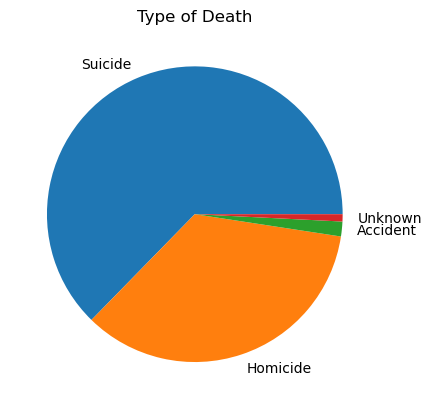

62.68% of gun deaths are suicides.
34.91% of gun deaths are homicides.


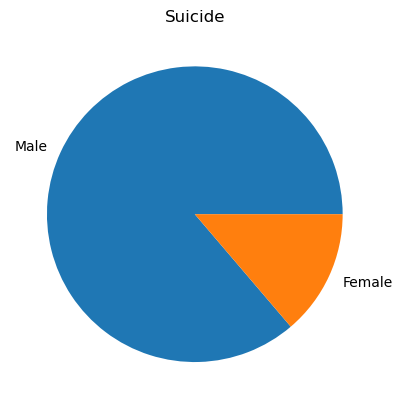

86.24% of suicide victims are male.


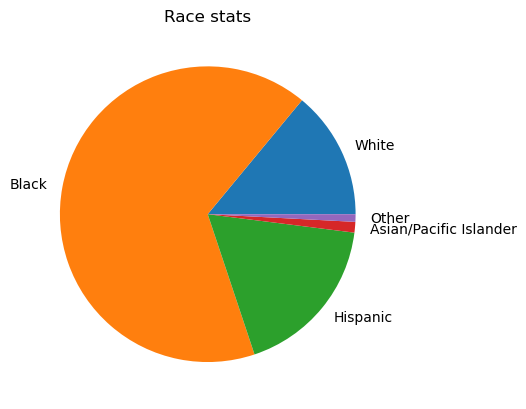

66.12% of homicide victims who are males in the age-group of 15--34 are black.
Women constitue only 15.29% of the total homicide victims.


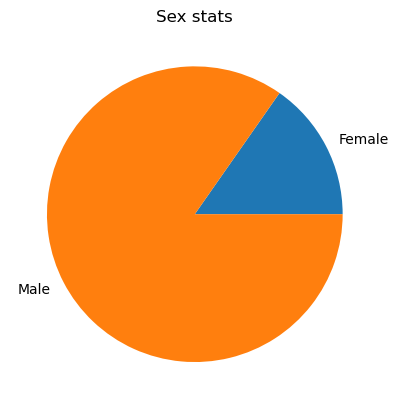

In [45]:
## Compute #suicides
suicides = df_filtered[df_filtered['Intent'] == 'Suicide']['Deaths'].sum()

death_counts = []
intents = df_filtered['Intent'].unique()
for intent in (intents): 
    death_counts.append(df_filtered[df_filtered['Intent'] == intent]['Deaths'].sum())

plt.pie(death_counts, labels=intents)
plt.title('Type of Death')
plt.show()
print(f'{suicides/all_deaths*100:.2f}% of gun deaths are suicides.')

## Compute #homicides
homicides = df_filtered[
                (df_filtered['Intent'] == 'Homicide')
            ]['Deaths'].sum()
print(f'{homicides/all_deaths*100:.2f}% of gun deaths are homicides.')

## Compute #male-suicides
male_suicides = df_filtered[
                    (df_filtered['Intent'] == 'Suicide') & 
                    (df_filtered['Gender'] == 'Male')
                ]['Deaths'].sum()

plt.pie((male_suicides, suicides-male_suicides), labels=('Male', 'Female'))
plt.title('Suicide')
plt.show()
print(f'{male_suicides/suicides*100:.2f}% of suicide victims are male.')

## Compute #young-black-male-homicides
young_black_male_homicides = df_filtered[
                                (df_filtered['Intent'] == 'Homicide') & 
                                (df_filtered['Gender'] == 'Male') & 
                                (df_filtered['Age'] == '15 - 34') & 
                                (df_filtered['Race'] == 'Black')
                            ]['Deaths'].sum()

## Compute #young-male-homicides
young_male_homicides = df_filtered[
                            (df_filtered['Intent'] == 'Homicide') & 
                            (df_filtered['Gender'] == 'Male') & 
                            (df_filtered['Age'] == '15 - 34')
                        ]['Deaths'].sum()
young_black_males_counts = []
races = df_filtered['Race'].unique()
for race in (races): 
    young_black_males_counts.append(df_filtered[(df_filtered['Race'] == race) & (df_filtered['Intent'] == 'Homicide') & (df_filtered['Gender'] == 'Male') & (df_filtered['Age'] == '15 - 34')]['Deaths'].sum())

plt.pie(young_black_males_counts, labels=races)
plt.title('Race stats')
plt.show()

print(f'{young_black_male_homicides/young_male_homicides*100:.2f}% of homicide victims who are males in the age-group of 15--34 are black.')

## Compute #women-homicides
women_homicides = df_filtered[
                        (df_filtered['Intent'] == 'Homicide') & 
                        (df_filtered['Gender'] == 'Female')
                    ]['Deaths'].sum()
male_homicides = df_filtered[
                        (df_filtered['Intent'] == 'Homicide') & 
                        (df_filtered['Gender'] == 'Male')
                    ]['Deaths'].sum()

plt.pie((women_homicides, male_homicides), labels=('Female', 'Male'))
plt.title('Sex stats')
print(f'Women constitue only {women_homicides/homicides*100:.2f}% of the total homicide victims.')